In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import numpy as np
import warnings
from pandas.api.types import is_numeric_dtype
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from collections import OrderedDict
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error, root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from xgboost import XGBRegressor
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import scipy.stats as stats
import statsmodels.api as sm
import json
import requests

warnings.filterwarnings('ignore')

In [2]:
import importlib
import sys
import os
parent_dir = os.path.dirname(os.path.dirname(os.path.abspath('')))

print(parent_dir)
sys.path.insert(0,parent_dir)
import data_manipulation.data_transform as dat

importlib.reload(dat)

/home/cody/Documents/DataSciBC/EPLTransfer


<module 'data_manipulation.data_transform' from '/home/cody/Documents/DataSciBC/EPLTransfer/data_manipulation/data_transform.py'>

In [3]:
main_data_path = "../../data/main_data/train/train.csv"
train = pd.read_csv(main_data_path)
train_drop = dat.transformer(train,EDA=False).data

In [4]:
train_drop.head()


,height,market_value,minutesPlayed,totalLongBalls,keyPass,totalPass,totalCross,goalAssist,savedShotsFromInsideTheBox,saves,...,xGChain,xGBuildup,age,pos_D,pos_F,pos_G,pos_M,foot_both,foot_left,foot_right
0,178.0,12.765691,1216,66,19,603,36,1,0,0,...,0.000000,0.000000,24.0,False,False,False,True,False,False,True
1,180.0,13.122365,8050,596,134,4812,358,9,0,0,...,0.208742,0.139566,35.0,False,False,False,True,False,False,True
2,178.0,14.346139,172,2,3,40,7,0,0,0,...,0.000000,0.000000,21.0,False,False,False,True,False,True,False
3,189.0,15.424949,21485,1470,185,19210,19,23,0,0,...,0.648687,0.604063,34.0,False,False,False,True,False,False,True
4,176.0,15.607270,0,0,0,0,0,0,0,0,...,0.442113,0.061499,18.0,False,True,False,False,False,False,True


In [5]:
train_drop

,height,market_value,minutesPlayed,totalLongBalls,keyPass,totalPass,totalCross,goalAssist,savedShotsFromInsideTheBox,saves,...,xGChain,xGBuildup,age,pos_D,pos_F,pos_G,pos_M,foot_both,foot_left,foot_right
0,178.0,12.765691,1216,66,19,603,36,1,0,0,...,0.000000,0.000000,24.0,False,False,False,True,False,False,True
1,180.0,13.122365,8050,596,134,4812,358,9,0,0,...,0.208742,0.139566,35.0,False,False,False,True,False,False,True
2,178.0,14.346139,172,2,3,40,7,0,0,0,...,0.000000,0.000000,21.0,False,False,False,True,False,True,False
3,189.0,15.424949,21485,1470,185,19210,19,23,0,0,...,0.648687,0.604063,34.0,False,False,False,True,False,False,True
4,176.0,15.607270,0,0,0,0,0,0,0,0,...,0.442113,0.061499,18.0,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9402,173.0,12.899222,449,3,3,84,9,1,0,0,...,0.000000,0.000000,29.0,False,True,False,False,False,False,True
9403,183.0,16.118096,11984,620,35,5937,56,5,0,0,...,0.110679,0.098402,26.0,True,False,False,False,False,False,True
9404,176.0,13.122365,656,11,4,299,13,2,0,0,...,0.222928,0.197106,38.0,True,False,False,False,False,True,False
9405,177.0,12.206078,6573,23,49,1211,22,8,0,0,...,0.000000,0.000000,33.0,False,True,False,False,False,False,True


In [6]:
train_drop.columns

Index(['height', 'market_value', 'minutesPlayed', 'totalLongBalls', 'keyPass',
       'totalPass', 'totalCross', 'goalAssist', 'savedShotsFromInsideTheBox',
       'saves', 'totalKeeperSweeper', 'goalsPrevented', 'touches',
       'possessionLostCtrl', 'dispossessed', 'aerialLost', 'aerialWon',
       'duelLost', 'duelWon', 'challengeLost', 'outfielderBlock',
       'totalContest', 'interceptionWon', 'wonContest', 'totalTackle',
       'totalClearance', 'blockedScoringAttempt', 'hitWoodwork',
       'bigChanceCreated', 'bigChanceMissed', 'shotOffTarget',
       'onTargetScoringAttempt', 'goals', 'wasFouled', 'fouls', 'totalOffside',
       'yellow_card', 'red_card', 'rating', 'accuratePass',
       'accurateLongBalls', 'accurateCross', 'accurateKeeperSweeper',
       'expectedAssists', 'expectedGoals', 'xGChain', 'xGBuildup', 'age',
       'pos_D', 'pos_F', 'pos_G', 'pos_M', 'foot_both', 'foot_left',
       'foot_right'],
      dtype='object')

In [7]:
features = ['height', 'minutesPlayed', 'totalLongBalls', 'keyPass',
       'totalPass', 'totalCross', 'goalAssist', 'savedShotsFromInsideTheBox',
       'saves', 'totalKeeperSweeper', 'goalsPrevented', 'touches',
       'possessionLostCtrl', 'dispossessed', 'aerialLost', 'aerialWon',
       'duelLost', 'duelWon', 'challengeLost', 'outfielderBlock',
       'totalContest', 'interceptionWon', 'wonContest', 'totalTackle',
       'totalClearance', 'blockedScoringAttempt', 'hitWoodwork',
       'bigChanceCreated', 'bigChanceMissed', 'shotOffTarget',
       'onTargetScoringAttempt', 'goals', 'wasFouled', 'fouls', 'totalOffside',
       'yellow_card', 'red_card', 'rating', 'accuratePass',
       'accurateLongBalls', 'accurateCross', 'accurateKeeperSweeper',
       'expectedAssists', 'expectedGoals', 'xGChain', 'xGBuildup', 'age',
       'pos_D', 'pos_F', 'pos_G', 'pos_M', 'foot_both', 'foot_left',
       'foot_right']
target = 'market_value'

In [8]:
# Baseline Linear Regression with this data:
reg = LinearRegression()
reg.fit(train_drop[features],train_drop[target])


LinearRegression()

In [9]:
y_true = train_drop[target]
y_pred = reg.predict(train_drop[features])
residuals = y_true - y_pred
mse = mean_squared_error(y_true,y_pred)
r2 = r2_score(y_true,y_pred)
mae = mean_absolute_error(y_true,y_pred)
mape = mean_absolute_percentage_error(y_true,y_pred)
print(f'MSE = {mse}')
print(f'R^2: {r2}')
print(f'MAE = {mae}')
print(f'MAPE = {mape}')

MSE = 0.9984461703721835
R^2: 0.5187763166917276
MAE = 0.7797462668352036
MAPE = 0.05658910813252904


In [10]:
# lets do a k-fold cross validation.
cv = KFold(n_splits=10,shuffle=True,random_state=42,)
X = train_drop[features]
y = train_drop[target]

train_mses = []
train_rmses = []
train_R2 = []
train_maes = []
train_mapes = []


test_mses = []
test_rmses = []
test_R2 = []
test_maes = []
test_mapes = []

for train_index, val_index in cv.split(train_drop):
    X_train, X_val = X.iloc[train_index] , X.iloc[val_index]
    y_train, y_val = y.iloc[train_index] , y.iloc[val_index]

    model = LinearRegression()

    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_val)

    train_mses.append(mean_squared_error(y_train,y_train_pred))
    test_mses.append(mean_squared_error(y_val,y_test_pred))

    train_rmses.append(root_mean_squared_error(y_train,y_train_pred))
    test_rmses.append(root_mean_squared_error(y_val,y_test_pred))

    train_R2.append(r2_score(y_train,y_train_pred))
    test_R2.append(r2_score(y_val,y_test_pred))

    train_maes.append(mean_absolute_error(y_train,y_train_pred))
    test_maes.append(mean_absolute_error(y_val,y_test_pred))

    train_mapes.append(mean_absolute_percentage_error(y_train,y_train_pred))
    test_mapes.append(mean_absolute_percentage_error(y_val,y_test_pred))

print(f'MSE for train: mean: {np.mean(train_mses)} std: {np.std(train_mses)}') 
print(f'MSE for test:  mean: {np.mean(test_mses)}  std: {np.std(test_mses)}\n')

print(f'RMSE for train: mean: {np.mean(train_rmses)} std: {np.std(train_rmses)}') 
print(f'RMSE for test: mean: {np.mean(test_rmses)} std: {np.std(test_rmses)}\n')

print(f'R^2 for train: mean: {np.mean(train_R2)} std: {np.std(train_R2)}') 
print(f'R^2 for test: mean: {np.mean(test_R2)} std: {np.std(test_R2)}\n')

print(f'MAE for train: mean: {np.mean(train_maes)} std: {np.std(train_maes)}') 
print(f'MAE for test: mean: {np.mean(test_maes)} std: {np.std(test_maes)}\n')  

print(f'MAPE for train: mean: {np.mean(train_mapes)} std: {np.std(train_mapes)}') 
print(f'MAPE for test: mean: {np.mean(test_mapes)} std: {np.std(test_mapes)}\n')    



MSE for train: mean: 0.9975722170065119 std: 0.005828830166102653
MSE for test:  mean: 1.0156054798115344  std: 0.05520281466211257

RMSE for train: mean: 0.9987811041569754 std: 0.002919415264201222
RMSE for test: mean: 1.0074030140544425 std: 0.027288222469763868

R^2 for train: mean: 0.5191883146670029 std: 0.001884460286932112
R^2 for test: mean: 0.509755418012589 std: 0.01784671371001786

MAE for train: mean: 0.7794255435482832 std: 0.001982183027748938
MAE for test: mean: 0.7850826456803902 std: 0.016687775115695646

MAPE for train: mean: 0.05656670182844721 std: 0.00014438773505523388
MAPE for test: mean: 0.05695720146742924 std: 0.0012272967414096254



In [11]:
# Lets look at the features and see which ones are statistical significant for the target variable

X = train_drop[features]
X[['pos_D', 'pos_F', 'pos_G', 'pos_M', 'foot_both', 'foot_left',
       'foot_right']] = X[['pos_D', 'pos_F', 'pos_G', 'pos_M', 'foot_both', 'foot_left',
       'foot_right']]*1
y = train_drop[target]
X = sm.add_constant(X)

model = sm.OLS(y,X)
results = model.fit()
display(results.summary())
p_values = results.pvalues
significant_features = p_values[p_values<0.05].index[1:]
print(significant_features)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           market_value   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     193.9
Date:                Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:43:13   Log-Likelihood:                -13341.
No. Observations:                9407   AIC:                         2.679e+04
Df Residuals:                    9354   BIC:                         2.717e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          8.3648      0.230     36.324      0.000       7.913       8.816
height                         0.0059      0.002      3.057      0.002       0.002       0.010
minutesPlayed                  0.0001   1.66e-05      6.713      0.000     7.9e-05       0.000
totalLongBalls                -0.0007   9.93e-05     -7.449      0.000      -0.001      -0.001
keyPass                       -0.0028      0.001     -3.315      0.001      -0.004      -0.001
totalPass                      0.0002   7.04e-05      2.642      0.008     4.8e-05       0.000
totalCross                    -0.0006      0.000     -2.613      0.009      -0.001      -0.000
goalAssist                     0.0090      0.006      1.600      0.110      -0.002       0.020
savedShotsFromInsideTheBox    -0.0016      0.004     -0.393      0.695      -0.010       0.006
saves                          0.0042      0.003      1.563      0.118      -0.001       0.009
totalKeeperSweeper             0.0061      0.003      2.193      0.028       0.001       0.012
goalsPrevented                 0.0098      0.010      1.026      0.305      -0.009       0.028
touches                       -0.0003    6.9e-05     -3.694      0.000      -0.000      -0.000
possessionLostCtrl             0.0008   7.15e-05     10.864      0.000       0.001       0.001
dispossessed                  -0.0100      0.003     -3.052      0.002      -0.016      -0.004
aerialLost                    -0.0075      0.003     -2.322      0.020      -0.014      -0.001
aerialWon                     -0.0205      0.005     -4.432      0.000      -0.030      -0.011
duelLost                       0.0073      0.003      2.251      0.024       0.001       0.014
duelWon                        0.0203      0.005      4.334      0.000       0.011       0.029
challengeLost                 -0.0122      0.003     -3.647      0.000      -0.019      -0.006
outfielderBlock                0.0041      0.001      2.923      0.003       0.001       0.007
totalContest                  -0.0039      0.003     -1.185      0.236      -0.010       0.003
interceptionWon               -0.0029      0.001     -5.608      0.000      -0.004      -0.002
wonContest                    -0.0158      0.006     -2.537      0.011      -0.028      -0.004
totalTackle                   -0.0167      0.005     -3.548      0.000      -0.026      -0.007
totalClearance                 0.0002      0.000      0.576      0.564      -0.000       0.001
blockedScoringAttempt          0.0043      0.002      2.544      0.011       0.001       0.008
hitWoodwork                   -0.0191      0.009     -2.249      0.025      -0.036      -0.002
bigChanceCreated              -0.0020      0.004     -0.547      0.585      -0.009       0.005
bigChanceMissed                0.0098      

Index(['height', 'minutesPlayed', 'totalLongBalls', 'keyPass', 'totalPass',
       'totalCross', 'totalKeeperSweeper', 'touches', 'possessionLostCtrl',
       'dispossessed', 'aerialLost', 'aerialWon', 'duelLost', 'duelWon',
       'challengeLost', 'outfielderBlock', 'interceptionWon', 'wonContest',
       'totalTackle', 'blockedScoringAttempt', 'hitWoodwork',
       'bigChanceMissed', 'wasFouled', 'totalOffside', 'accuratePass',
       'accurateLongBalls', 'accurateCross', 'expectedAssists',
       'expectedGoals', 'xGBuildup', 'age', 'pos_D', 'pos_F', 'pos_G', 'pos_M',
       'foot_both', 'foot_left', 'foot_right'],
      dtype='object')


In [12]:
# Training on just the significant features gets us about the same performance in training.
reg_sign = LinearRegression()
reg_sign.fit(train_drop[significant_features],train_drop[target])
y_true_sign = train_drop[target]
y_pred_sign = reg_sign.predict(train_drop[significant_features])
residuals_sign = y_true_sign - y_pred_sign
mse = mean_squared_error(y_true_sign,y_pred_sign)
r2 = r2_score(y_true_sign,y_pred_sign)
mae = mean_absolute_error(y_true_sign,y_pred_sign)
mape = mean_absolute_percentage_error(y_true_sign,y_pred_sign)
print(f'MSE = {mse}')
print(f'R^2: {r2}')
print(f'MAE = {mae}')
print(f'MAPE = {mape}')

MSE = 1.0043686494202515
R^2: 0.5159218441458868
MAE = 0.7821000838709729
MAPE = 0.056760841509207426


In [13]:
# Lasso
# lets do a k-fold cross validation.
cv = KFold(n_splits=10,shuffle=True,random_state=42)
X = train_drop[features]
y = train_drop[target]

train_mses = []
train_rmses = []
train_R2 = []
train_maes = []
train_mapes = []


test_mses = []
test_rmses = []
test_R2 = []
test_maes = []
test_mapes = []

for train_index, val_index in cv.split(train_drop):
    X_train, X_val = X.iloc[train_index] , X.iloc[val_index]
    y_train, y_val = y.iloc[train_index] , y.iloc[val_index]

    model = Pipeline([('scale',StandardScaler()),('lasso',Lasso(alpha=1))])

    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_val)

    train_mses.append(mean_squared_error(y_train,y_train_pred))
    test_mses.append(mean_squared_error(y_val,y_test_pred))

    train_rmses.append(root_mean_squared_error(y_train,y_train_pred))
    test_rmses.append(root_mean_squared_error(y_val,y_test_pred))

    train_R2.append(r2_score(y_train,y_train_pred))
    test_R2.append(r2_score(y_val,y_test_pred))

    train_maes.append(mean_absolute_error(y_train,y_train_pred))
    test_maes.append(mean_absolute_error(y_val,y_test_pred))

    train_mapes.append(mean_absolute_percentage_error(y_train,y_train_pred))
    test_mapes.append(mean_absolute_percentage_error(y_val,y_test_pred))

print(f'MSE for train: mean: {np.mean(train_mses)} std: {np.std(train_mses)}') 
print(f'MSE for test:  mean: {np.mean(test_mses)}  std: {np.std(test_mses)}\n')

print(f'RMSE for train: mean: {np.mean(train_rmses)} std: {np.std(train_rmses)}') 
print(f'RMSE for test: mean: {np.mean(test_rmses)} std: {np.std(test_rmses)}\n')

print(f'R^2 for train: mean: {np.mean(train_R2)} std: {np.std(train_R2)}') 
print(f'R^2 for test: mean: {np.mean(test_R2)} std: {np.std(test_R2)}\n')

print(f'MAE for train: mean: {np.mean(train_maes)} std: {np.std(train_maes)}') 
print(f'MAE for test: mean: {np.mean(test_maes)} std: {np.std(test_maes)}\n')  

print(f'MAPE for train: mean: {np.mean(train_mapes)} std: {np.std(train_mapes)}') 
print(f'MAPE for test: mean: {np.mean(test_mapes)} std: {np.std(test_mapes)}\n')   

MSE for train: mean: 2.074768503537456 std: 0.009350608423225925
MSE for test:  mean: 2.0755314789564387  std: 0.08418822183988228

RMSE for train: mean: 1.4404020148400025 std: 0.003246410682124462
RMSE for test: mean: 1.4403746894168734 std: 0.0291930307382466

R^2 for train: mean: 0.0 std: 0.0
R^2 for test: mean: -0.0018488129000521659 std: 0.0033402100454971015

MAE for train: mean: 1.1451785559758823 std: 0.0023558860163399205
MAE for test: mean: 1.145384333192355 std: 0.020397476261825125

MAPE for train: mean: 0.08228174619988038 std: 0.0001615895050259653
MAPE for test: mean: 0.08229691025922718 std: 0.0016388496327969214



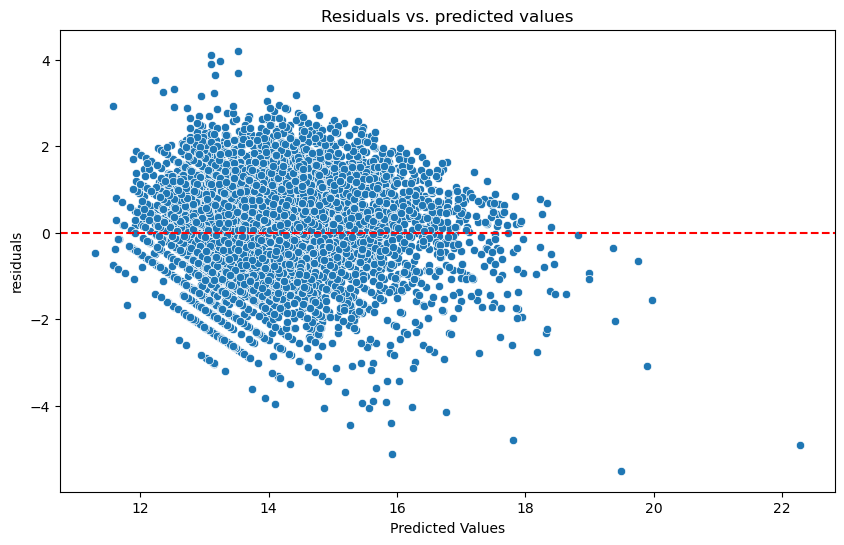

In [14]:
# Lets look at the residuals:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0,color='red',linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('residuals')
plt.title('Residuals vs. predicted values')
plt.show()

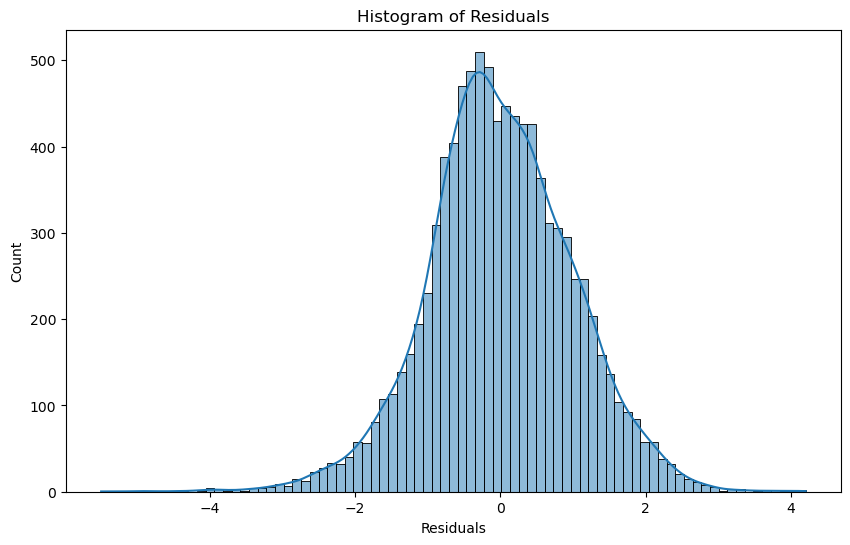

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Histogram of Residuals")
plt.show()

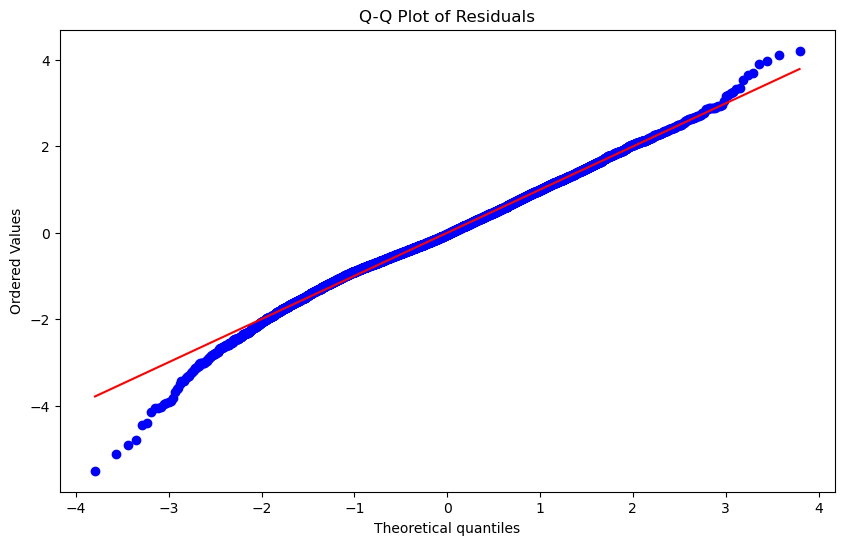

In [16]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

In [17]:
# This is showing that the errors is roughly normally distributed!

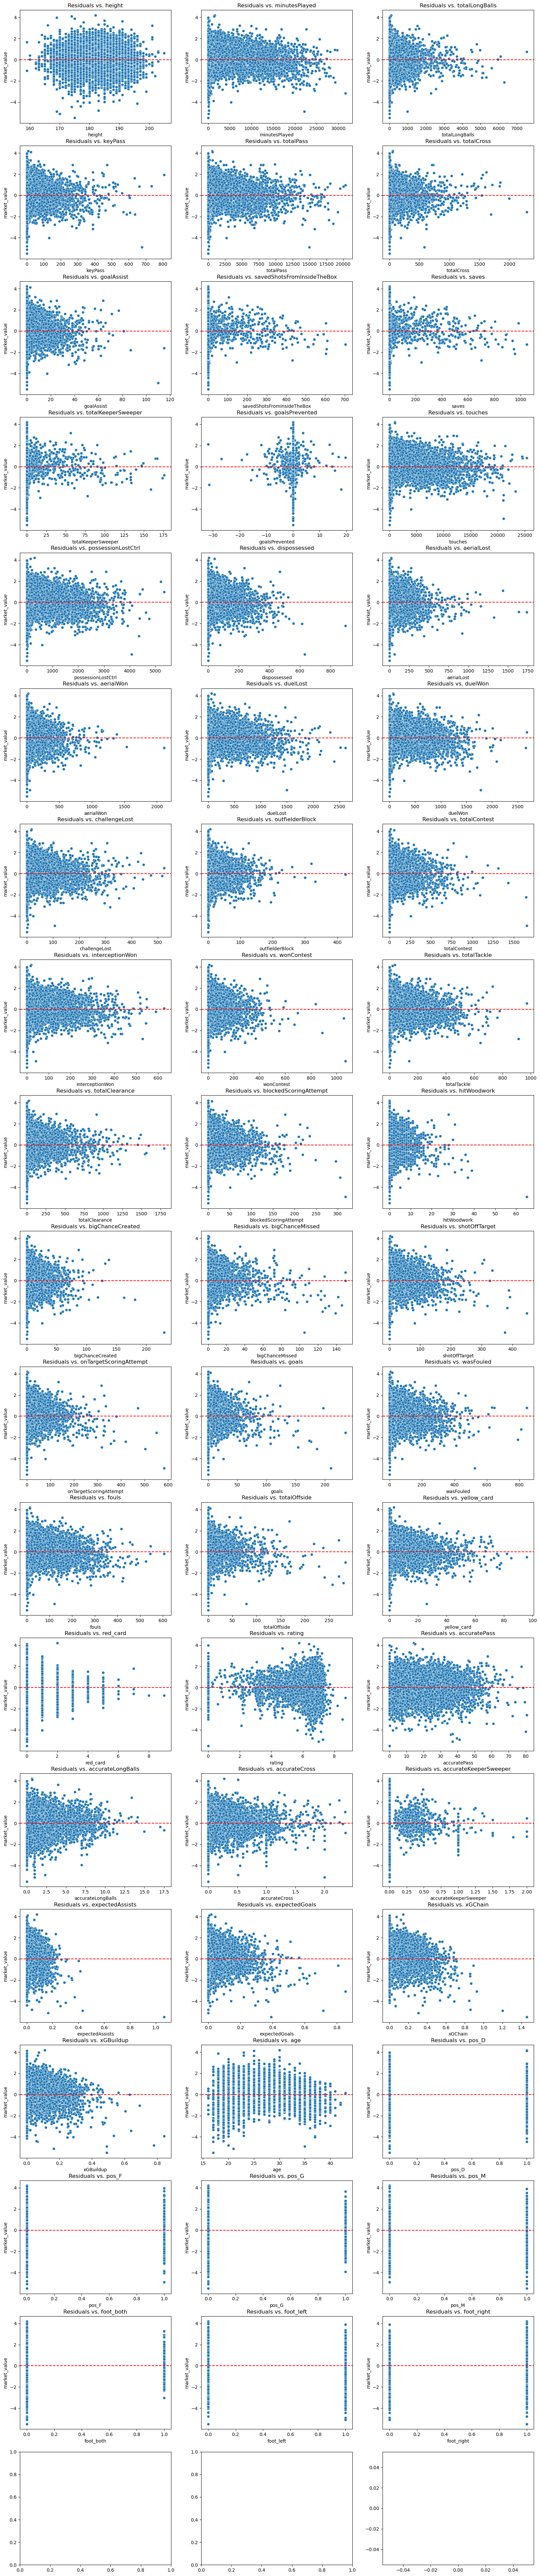

In [18]:
fig,axes = plt.subplots(ncols = 3,nrows=int(len(features)/3)+1,figsize=(20,100))
axes = axes.flatten()
for i, feature in enumerate(X.columns):  
    
    sns.scatterplot(x=X[feature], y=residuals,ax = axes[i])
    axes[i].axhline(0, color='red', linestyle='--')
    #axes[i].xlabel(feature)
    #axes[i].ylabel("Residuals")
    axes[i].set_title(f"Residuals vs. {feature}")
    sns.histplot()
plt.show()

In [19]:
# It does not look like any of the features is not normally distributed around 0 with respect to the residuals.

In [20]:
# Lets build a KNN and see how this does
n_neigh = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,35,40,45,50,60,70,80,90,100]
knnfold = KFold(n_splits=5)

X = train_drop[features]
y = train_drop[target]

train_mses = np.zeros(shape=(len(n_neigh),5))
test_mses = np.zeros(shape=(len(n_neigh),5))
j = 0
for train_index, ho_index in knnfold.split(train_drop):
    X_train, X_ho = X.iloc[train_index], X.iloc[ho_index]
    y_train, y_ho = y.iloc[train_index], y.iloc[ho_index]

    for i in range(len(n_neigh)):
        pipeline = Pipeline([('scale',StandardScaler()),('knn',KNeighborsRegressor(n_neighbors=n_neigh[i]))])

        pipeline.fit(X_train,y_train)

        y_train_p = pipeline.predict(X_train)
        y_ho_p = pipeline.predict(X_ho)

        train_mses[i][j] = mean_squared_error(y_train,y_train_p)
        test_mses[i][j] = mean_squared_error(y_ho,y_ho_p)
    j+=1

avg_train_mses = np.mean(train_mses,axis=1)
avg_test_mses = np.mean(test_mses,axis=1)
for i in range(len(n_neigh)):
    print(f'KNN with {n_neigh[i]} neighbors')
    print(f'Train MSE mean: {avg_train_mses[i]}')
    print(f'Holdout MSE mean: {avg_test_mses[i]}\n')

KNN with 2 neighbors
Train MSE mean: 0.42934256845187785
Holdout MSE mean: 1.3011083513165453

KNN with 3 neighbors
Train MSE mean: 0.5752729244840811
Holdout MSE mean: 1.1775834191736416

KNN with 4 neighbors
Train MSE mean: 0.6586706902319065
Holdout MSE mean: 1.1063911796931776

KNN with 5 neighbors
Train MSE mean: 0.7082531804143073
Holdout MSE mean: 1.0716657200191915

KNN with 6 neighbors
Train MSE mean: 0.7443537752098799
Holdout MSE mean: 1.0530973810090773

KNN with 7 neighbors
Train MSE mean: 0.7709019558584856
Holdout MSE mean: 1.041479979623805

KNN with 8 neighbors
Train MSE mean: 0.7943265572784414
Holdout MSE mean: 1.0376555229668394

KNN with 9 neighbors
Train MSE mean: 0.8138889347108688
Holdout MSE mean: 1.0271856480718458

KNN with 10 neighbors
Train MSE mean: 0.8303407731983145
Holdout MSE mean: 1.0234383066097537

KNN with 11 neighbors
Train MSE mean: 0.8431751853615428
Holdout MSE mean: 1.0207811711713064

KNN with 12 neighbors
Train MSE mean: 0.8544510602264935
H

In general, KNN does about the same as Linear regression, so no real improvement.  

In [21]:
# Lets use a Decision Tree regressor
# lets do a k-fold cross validation.
cv = KFold(n_splits=10,shuffle=True,random_state=42)
X = train_drop[features]
y = train_drop[target]

train_mses = []
train_rmses = []
train_R2 = []
train_maes = []
train_mapes = []


test_mses = []
test_rmses = []
test_R2 = []
test_maes = []
test_mapes = []

for train_index, val_index in cv.split(train_drop):
    X_train, X_val = X.iloc[train_index] , X.iloc[val_index]
    y_train, y_val = y.iloc[train_index] , y.iloc[val_index]

    model = DecisionTreeRegressor()

    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_val)

    train_mses.append(mean_squared_error(y_train,y_train_pred))
    test_mses.append(mean_squared_error(y_val,y_test_pred))

    train_rmses.append(root_mean_squared_error(y_train,y_train_pred))
    test_rmses.append(root_mean_squared_error(y_val,y_test_pred))

    train_R2.append(r2_score(y_train,y_train_pred))
    test_R2.append(r2_score(y_val,y_test_pred))

    train_maes.append(mean_absolute_error(y_train,y_train_pred))
    test_maes.append(mean_absolute_error(y_val,y_test_pred))

    train_mapes.append(mean_absolute_percentage_error(y_train,y_train_pred))
    test_mapes.append(mean_absolute_percentage_error(y_val,y_test_pred))

print(f'MSE for train: mean: {np.mean(train_mses)} std: {np.std(train_mses)}') 
print(f'MSE for test:  mean: {np.mean(test_mses)}  std: {np.std(test_mses)}\n')

print(f'RMSE for train: mean: {np.mean(train_rmses)} std: {np.std(train_rmses)}') 
print(f'RMSE for test: mean: {np.mean(test_rmses)} std: {np.std(test_rmses)}\n')

print(f'R^2 for train: mean: {np.mean(train_R2)} std: {np.std(train_R2)}') 
print(f'R^2 for test: mean: {np.mean(test_R2)} std: {np.std(test_R2)}\n')

print(f'MAE for train: mean: {np.mean(train_maes)} std: {np.std(train_maes)}') 
print(f'MAE for test: mean: {np.mean(test_maes)} std: {np.std(test_maes)}\n')  

print(f'MAPE for train: mean: {np.mean(train_mapes)} std: {np.std(train_mapes)}') 
print(f'MAPE for test: mean: {np.mean(test_mapes)} std: {np.std(test_mapes)}\n')   


MSE for train: mean: 8.054191479421007e-32 std: 9.70484223029926e-33
MSE for test:  mean: 1.355146678509955  std: 0.053518627086285304

RMSE for train: mean: 2.8327865106684433e-16 std: 1.7179075759746828e-17
RMSE for test: mean: 1.163886955379232 std: 0.022667898182607046

R^2 for train: mean: 1.0 std: 0.0
R^2 for test: mean: 0.3451246682475171 std: 0.030248268190556586

MAE for train: mean: 4.534106718186384e-17 std: 5.46334048150815e-18
MAE for test: mean: 0.9021811807568314 std: 0.017770284539365338

MAPE for train: mean: 3.3885354190687534e-18 std: 4.050292006418438e-19
MAPE for test: mean: 0.06511639045304148 std: 0.0013193927745705927



Decision Tree Regressor overfits really hard.

In [22]:
#Lets try Random Forest Regression to reduce the overfitting
# Lets use a Decision Tree regressor
# lets do a k-fold cross validation.
cv = KFold(n_splits=10,shuffle=True,random_state=42)
X = train_drop[features]
y = train_drop[target]

train_mses = []
train_rmses = []
train_R2 = []
train_maes = []
train_mapes = []


test_mses = []
test_rmses = []
test_R2 = []
test_maes = []
test_mapes = []

for train_index, val_index in cv.split(train_drop):
    X_train, X_val = X.iloc[train_index] , X.iloc[val_index]
    y_train, y_val = y.iloc[train_index] , y.iloc[val_index]

    model = RandomForestRegressor()

    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_val)

    train_mses.append(mean_squared_error(y_train,y_train_pred))
    test_mses.append(mean_squared_error(y_val,y_test_pred))

    train_rmses.append(root_mean_squared_error(y_train,y_train_pred))
    test_rmses.append(root_mean_squared_error(y_val,y_test_pred))

    train_R2.append(r2_score(y_train,y_train_pred))
    test_R2.append(r2_score(y_val,y_test_pred))

    train_maes.append(mean_absolute_error(y_train,y_train_pred))
    test_maes.append(mean_absolute_error(y_val,y_test_pred))

    train_mapes.append(mean_absolute_percentage_error(y_train,y_train_pred))
    test_mapes.append(mean_absolute_percentage_error(y_val,y_test_pred))

print(f'MSE for train: mean: {np.mean(train_mses)} std: {np.std(train_mses)}') 
print(f'MSE for test:  mean: {np.mean(test_mses)}  std: {np.std(test_mses)}\n')

print(f'RMSE for train: mean: {np.mean(train_rmses)} std: {np.std(train_rmses)}') 
print(f'RMSE for test: mean: {np.mean(test_rmses)} std: {np.std(test_rmses)}\n')

print(f'R^2 for train: mean: {np.mean(train_R2)} std: {np.std(train_R2)}') 
print(f'R^2 for test: mean: {np.mean(test_R2)} std: {np.std(test_R2)}\n')

print(f'MAE for train: mean: {np.mean(train_maes)} std: {np.std(train_maes)}') 
print(f'MAE for test: mean: {np.mean(test_maes)} std: {np.std(test_maes)}\n')  

print(f'MAPE for train: mean: {np.mean(train_mapes)} std: {np.std(train_mapes)}') 
print(f'MAPE for test: mean: {np.mean(test_mapes)} std: {np.std(test_mapes)}\n')   

MSE for train: mean: 0.09237719198681531 std: 0.0004013126111009907
MSE for test:  mean: 0.65708295192563  std: 0.025031992466218157

RMSE for train: mean: 0.30393544702748343 std: 0.0006603234200768398
RMSE for test: mean: 0.810459230546275 std: 0.015452752116364892

R^2 for train: mean: 0.9554756137652788 std: 0.00015153999100538874
R^2 for test: mean: 0.6825956002021015 std: 0.011446568574382851

MAE for train: mean: 0.23357238380585313 std: 0.0006265983568727594
MAE for test: mean: 0.6284308180814889 std: 0.011360688794299642

MAPE for train: mean: 0.01688218092331567 std: 4.048974213896889e-05
MAPE for test: mean: 0.04542113586281884 std: 0.0007783054865211227



In [23]:
# Lets Try Gradient Boosting Regression
# lets do a k-fold cross validation.
cv = KFold(n_splits=10,shuffle=True,random_state=42)
X = train_drop[features]
y = train_drop[target]

train_mses = []
train_rmses = []
train_R2 = []
train_maes = []
train_mapes = []


test_mses = []
test_rmses = []
test_R2 = []
test_maes = []
test_mapes = []

for train_index, val_index in cv.split(train_drop):
    X_train, X_val = X.iloc[train_index] , X.iloc[val_index]
    y_train, y_val = y.iloc[train_index] , y.iloc[val_index]

    model = GradientBoostingRegressor()

    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_val)

    train_mses.append(mean_squared_error(y_train,y_train_pred))
    test_mses.append(mean_squared_error(y_val,y_test_pred))

    train_rmses.append(root_mean_squared_error(y_train,y_train_pred))
    test_rmses.append(root_mean_squared_error(y_val,y_test_pred))

    train_R2.append(r2_score(y_train,y_train_pred))
    test_R2.append(r2_score(y_val,y_test_pred))

    train_maes.append(mean_absolute_error(y_train,y_train_pred))
    test_maes.append(mean_absolute_error(y_val,y_test_pred))

    train_mapes.append(mean_absolute_percentage_error(y_train,y_train_pred))
    test_mapes.append(mean_absolute_percentage_error(y_val,y_test_pred))

print(f'MSE for train: mean: {np.mean(train_mses)} std: {np.std(train_mses)}') 
print(f'MSE for test:  mean: {np.mean(test_mses)}  std: {np.std(test_mses)}\n')

print(f'RMSE for train: mean: {np.mean(train_rmses)} std: {np.std(train_rmses)}') 
print(f'RMSE for test: mean: {np.mean(test_rmses)} std: {np.std(test_rmses)}\n')

print(f'R^2 for train: mean: {np.mean(train_R2)} std: {np.std(train_R2)}') 
print(f'R^2 for test: mean: {np.mean(test_R2)} std: {np.std(test_R2)}\n')

print(f'MAE for train: mean: {np.mean(train_maes)} std: {np.std(train_maes)}') 
print(f'MAE for test: mean: {np.mean(test_maes)} std: {np.std(test_maes)}\n')  

print(f'MAPE for train: mean: {np.mean(train_mapes)} std: {np.std(train_mapes)}') 
print(f'MAPE for test: mean: {np.mean(test_mapes)} std: {np.std(test_mapes)}\n')   

MSE for train: mean: 0.5864634479568622 std: 0.0028973866738288465
MSE for test:  mean: 0.6658257216900024  std: 0.018758146714681467

RMSE for train: mean: 0.7658066806470333 std: 0.0018909873704386895
RMSE for test: mean: 0.8159012512993952 std: 0.011439834705254653

R^2 for train: mean: 0.7173328683865255 std: 0.0013433358877978428
R^2 for test: mean: 0.6782102937641509 std: 0.012950192776742113

MAE for train: mean: 0.5923583215588321 std: 0.002023216328962732
MAE for test: mean: 0.632789497746047 std: 0.009461406510643165

MAPE for train: mean: 0.04293122449443882 std: 0.00013870016251285743
MAPE for test: mean: 0.04576765579849693 std: 0.0006545558705065442



In [24]:
# Lets do a Support Vector Regression (SVR)

# lets do a k-fold cross validation.
cv = KFold(n_splits=10,shuffle=True,random_state=42)
X = train_drop[features]
y = train_drop[target]

train_mses = []
train_rmses = []
train_R2 = []
train_maes = []
train_mapes = []


test_mses = []
test_rmses = []
test_R2 = []
test_maes = []
test_mapes = []

for train_index, val_index in cv.split(train_drop):
    X_train, X_val = X.iloc[train_index] , X.iloc[val_index]
    y_train, y_val = y.iloc[train_index] , y.iloc[val_index]

    model = SVR()

    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_val)

    train_mses.append(mean_squared_error(y_train,y_train_pred))
    test_mses.append(mean_squared_error(y_val,y_test_pred))

    train_rmses.append(root_mean_squared_error(y_train,y_train_pred))
    test_rmses.append(root_mean_squared_error(y_val,y_test_pred))

    train_R2.append(r2_score(y_train,y_train_pred))
    test_R2.append(r2_score(y_val,y_test_pred))

    train_maes.append(mean_absolute_error(y_train,y_train_pred))
    test_maes.append(mean_absolute_error(y_val,y_test_pred))

    train_mapes.append(mean_absolute_percentage_error(y_train,y_train_pred))
    test_mapes.append(mean_absolute_percentage_error(y_val,y_test_pred))

print(f'MSE for train: mean: {np.mean(train_mses)} std: {np.std(train_mses)}') 
print(f'MSE for test:  mean: {np.mean(test_mses)}  std: {np.std(test_mses)}\n')

print(f'RMSE for train: mean: {np.mean(train_rmses)} std: {np.std(train_rmses)}') 
print(f'RMSE for test: mean: {np.mean(test_rmses)} std: {np.std(test_rmses)}\n')

print(f'R^2 for train: mean: {np.mean(train_R2)} std: {np.std(train_R2)}') 
print(f'R^2 for test: mean: {np.mean(test_R2)} std: {np.std(test_R2)}\n')

print(f'MAE for train: mean: {np.mean(train_maes)} std: {np.std(train_maes)}') 
print(f'MAE for test: mean: {np.mean(test_maes)} std: {np.std(test_maes)}\n')  

print(f'MAPE for train: mean: {np.mean(train_mapes)} std: {np.std(train_mapes)}') 
print(f'MAPE for test: mean: {np.mean(test_mapes)} std: {np.std(test_mapes)}\n')   

MSE for train: mean: 1.329348810814049 std: 0.006765356172428186
MSE for test:  mean: 1.341533106851778  std: 0.0603287623359599

RMSE for train: mean: 1.1529701626605235 std: 0.002935102828522165
RMSE for test: mean: 1.157955028734222 std: 0.025947221063256684

R^2 for train: mean: 0.3592754241529733 std: 0.0024956253234527533
R^2 for test: mean: 0.3521549342091629 std: 0.02313141916668278

MAE for train: mean: 0.9104899702608422 std: 0.00251022230702108
MAE for test: mean: 0.9157272699788747 std: 0.022401782939103596

MAPE for train: mean: 0.06506334197435203 std: 0.00015796774956619073
MAPE for test: mean: 0.06541947730026505 std: 0.0015313660511176868



In [25]:
# Finally, lets try XGBoost
# lets do a k-fold cross validation.
cv = KFold(n_splits=10,shuffle=True,random_state=42)
X = train_drop[features]
y = train_drop[target]

train_mses = []
train_rmses = []
train_R2 = []
train_maes = []
train_mapes = []


test_mses = []
test_rmses = []
test_R2 = []
test_maes = []
test_mapes = []

for train_index, val_index in cv.split(train_drop):
    X_train, X_val = X.iloc[train_index] , X.iloc[val_index]
    y_train, y_val = y.iloc[train_index] , y.iloc[val_index]

    model = XGBRegressor()

    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_val)

    train_mses.append(mean_squared_error(y_train,y_train_pred))
    test_mses.append(mean_squared_error(y_val,y_test_pred))

    train_rmses.append(root_mean_squared_error(y_train,y_train_pred))
    test_rmses.append(root_mean_squared_error(y_val,y_test_pred))

    train_R2.append(r2_score(y_train,y_train_pred))
    test_R2.append(r2_score(y_val,y_test_pred))

    train_maes.append(mean_absolute_error(y_train,y_train_pred))
    test_maes.append(mean_absolute_error(y_val,y_test_pred))

    train_mapes.append(mean_absolute_percentage_error(y_train,y_train_pred))
    test_mapes.append(mean_absolute_percentage_error(y_val,y_test_pred))

print(f'MSE for train: mean: {np.mean(train_mses)} std: {np.std(train_mses)}') 
print(f'MSE for test:  mean: {np.mean(test_mses)}  std: {np.std(test_mses)}\n')

print(f'RMSE for train: mean: {np.mean(train_rmses)} std: {np.std(train_rmses)}') 
print(f'RMSE for test: mean: {np.mean(test_rmses)} std: {np.std(test_rmses)}\n')

print(f'R^2 for train: mean: {np.mean(train_R2)} std: {np.std(train_R2)}') 
print(f'R^2 for test: mean: {np.mean(test_R2)} std: {np.std(test_R2)}\n')

print(f'MAE for train: mean: {np.mean(train_maes)} std: {np.std(train_maes)}') 
print(f'MAE for test: mean: {np.mean(test_maes)} std: {np.std(test_maes)}\n')  

print(f'MAPE for train: mean: {np.mean(train_mapes)} std: {np.std(train_mapes)}') 
print(f'MAPE for test: mean: {np.mean(test_mapes)} std: {np.std(test_mapes)}\n')   

MSE for train: mean: 0.15053355813580327 std: 0.0050784739275281515
MSE for test:  mean: 0.6896949528721755  std: 0.02301081551804946

RMSE for train: mean: 0.3879312958277842 std: 0.006547354670357597
RMSE for test: mean: 0.8303626124172322 std: 0.01388829621677762

R^2 for train: mean: 0.9274497234394579 std: 0.0023059115982460073
R^2 for test: mean: 0.6666416481224393 std: 0.015451092367690983

MAE for train: mean: 0.28759004238114577 std: 0.004545976201126551
MAE for test: mean: 0.6409196244057049 std: 0.013821387235916706

MAPE for train: mean: 0.02102367873391369 std: 0.0003270401368668318
MAPE for test: mean: 0.04637153081848778 std: 0.000977735882293424



## Conclusion with these types of models
For our baseline Linear regression, which does really well, but we have that XGBoost does the best in terms of RMSE but it does have a lot more variance, so if we are maybe able to reduce the variance, then we can get a better performance. On the other hand, Gradient Boosting regression just does better then Linear regression  

In [82]:
# Next, lets do some testing with the features that are not linear with the target variable and see what we can do
train_x = train_drop.copy()
train_x['squared_root_age'] = np.sqrt(train_x['age'])

train_x['squared_age'] = np.pow(train_x['age'],2)
train_x['squared_root_height'] = np.sqrt(train_x['height'])

In [87]:
features_x = ['height', 'minutesPlayed', 'totalLongBalls', 'keyPass',
       'totalPass', 'totalCross', 'goalAssist', 'savedShotsFromInsideTheBox',
       'saves', 'totalKeeperSweeper', 'goalsPrevented', 'touches',
       'possessionLostCtrl', 'dispossessed', 'aerialLost', 'aerialWon',
       'duelLost', 'duelWon', 'challengeLost', 'outfielderBlock',
       'totalContest', 'interceptionWon', 'wonContest', 'totalTackle',
       'totalClearance', 'blockedScoringAttempt', 'hitWoodwork',
       'bigChanceCreated', 'bigChanceMissed', 'shotOffTarget',
       'onTargetScoringAttempt', 'goals', 'wasFouled', 'fouls', 'totalOffside',
       'yellow_card', 'red_card', 'rating', 'accuratePass',
       'accurateLongBalls', 'accurateCross', 'accurateKeeperSweeper',
       'expectedAssists', 'expectedGoals', 'xGChain', 'xGBuildup','age','squared_root_age',
       'pos_D', 'pos_F', 'pos_G', 'pos_M', 'foot_both', 'foot_left',
       'foot_right']
target = 'market_value'

features_x_sign = ['height', 'minutesPlayed', 'totalLongBalls', 'keyPass', 'totalPass',
       'totalCross', 'totalKeeperSweeper', 'touches', 'possessionLostCtrl',
       'dispossessed', 'aerialLost', 'aerialWon', 'duelLost', 'duelWon',
       'challengeLost', 'outfielderBlock', 'interceptionWon', 'wonContest',
       'totalTackle', 'blockedScoringAttempt', 'hitWoodwork',
       'bigChanceMissed', 'wasFouled', 'totalOffside', 'accuratePass',
       'accurateLongBalls', 'accurateCross', 'expectedAssists',
       'expectedGoals', 'xGBuildup', 'age','squared_root_age', 'pos_D', 'pos_F', 'pos_G', 'pos_M',
       'foot_both', 'foot_left', 'foot_right']



In [88]:
def scale_back(x):
    return np.exp(x) - 1

In [91]:
# lets do a k-fold cross validation.
cv = KFold(n_splits=10,shuffle=True,random_state=42,)
X = train_x[features_x]
y = train_x[target]

train_mses = []
train_rmses = []
train_R2 = []
train_maes = []
train_mapes = []


test_mses = []
test_rmses = []
test_R2 = []
test_maes = []
test_mapes = []

for train_index, val_index in cv.split(train_drop):
    X_train, X_val = X.iloc[train_index] , X.iloc[val_index]
    y_train, y_val = y.iloc[train_index] , y.iloc[val_index]

    model = LinearRegression()

    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_val)

    train_mses.append(mean_squared_error(scale_back(y_train),scale_back(y_train_pred)))
    test_mses.append(mean_squared_error(scale_back(y_val),scale_back(y_test_pred)))

    train_rmses.append(root_mean_squared_error(scale_back(y_train),scale_back(y_train_pred)))
    test_rmses.append(root_mean_squared_error(scale_back(y_val),scale_back(y_test_pred)))

    train_R2.append(r2_score(y_train,y_train_pred))
    test_R2.append(r2_score(y_val,y_test_pred))

    train_maes.append(mean_absolute_error(y_train,y_train_pred))
    test_maes.append(mean_absolute_error(y_val,y_test_pred))

    train_mapes.append(mean_absolute_percentage_error(y_train,y_train_pred))
    test_mapes.append(mean_absolute_percentage_error(y_val,y_test_pred))

print(f'MSE for train: mean: {np.mean(train_mses)} std: {np.std(train_mses)}') 
print(f'MSE for test:  mean: {np.mean(test_mses)}  std: {np.std(test_mses)}\n')

print(f'RMSE for train: mean: {np.mean(train_rmses)} std: {np.std(train_rmses)}') 
print(f'RMSE for test: mean: {np.mean(test_rmses)} std: {np.std(test_rmses)}\n')

print(f'R^2 for train: mean: {np.mean(train_R2)} std: {np.std(train_R2)}') 
print(f'R^2 for test: mean: {np.mean(test_R2)} std: {np.std(test_R2)}\n')

print(f'MAE for train: mean: {np.mean(train_maes)} std: {np.std(train_maes)}') 
print(f'MAE for test: mean: {np.mean(test_maes)} std: {np.std(test_maes)}\n')  

print(f'MAPE for train: mean: {np.mean(train_mapes)} std: {np.std(train_mapes)}') 
print(f'MAPE for test: mean: {np.mean(test_mapes)} std: {np.std(test_mapes)}\n')

MSE for train: mean: 1190429508371785.5 std: 509935096966510.94
MSE for test:  mean: 2.511140167650852e+16  std: 7.495792625730405e+16

RMSE for train: mean: 33372055.210775096 std: 8759876.67611618
RMSE for test: mean: 59120534.50838341 std: 147024365.5859517

R^2 for train: mean: 0.565775349465661 std: 0.0015226347018229463
R^2 for test: mean: 0.5575610198910687 std: 0.01420897359690705

MAE for train: mean: 0.7386720186301736 std: 0.0017159985219543591
MAE for test: mean: 0.7441975197272479 std: 0.01469075987033652

MAPE for train: mean: 0.053440129399818126 std: 0.00012475422663641502
MAPE for test: mean: 0.053822098858365655 std: 0.0011230673726870806



In [92]:
# Lets Try Gradient Boosting Regression
# lets do a k-fold cross validation.
cv = KFold(n_splits=10,shuffle=True,random_state=42)
X = train_x[features_x]
y = train_x[target]

train_mses = []
train_rmses = []
train_R2 = []
train_maes = []
train_mapes = []


test_mses = []
test_rmses = []
test_R2 = []
test_maes = []
test_mapes = []

for train_index, val_index in cv.split(train_drop):
    X_train, X_val = X.iloc[train_index] , X.iloc[val_index]
    y_train, y_val = y.iloc[train_index] , y.iloc[val_index]

    model = GradientBoostingRegressor()

    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_val)

    train_mses.append(mean_squared_error(y_train,y_train_pred))
    test_mses.append(mean_squared_error(y_val,y_test_pred))

    train_rmses.append(root_mean_squared_error(scale_back(y_train),scale_back(y_train_pred)))
    test_rmses.append(root_mean_squared_error(scale_back(y_val),scale_back(y_test_pred)))

    train_R2.append(r2_score(y_train,y_train_pred))
    test_R2.append(r2_score(y_val,y_test_pred))

    train_maes.append(mean_absolute_error(y_train,y_train_pred))
    test_maes.append(mean_absolute_error(y_val,y_test_pred))

    train_mapes.append(mean_absolute_percentage_error(y_train,y_train_pred))
    test_mapes.append(mean_absolute_percentage_error(y_val,y_test_pred))

print(f'MSE for train: mean: {np.mean(train_mses)} std: {np.std(train_mses)}') 
print(f'MSE for test:  mean: {np.mean(test_mses)}  std: {np.std(test_mses)}\n')

print(f'RMSE for train: mean: {np.mean(train_rmses)} std: {np.std(train_rmses)}') 
print(f'RMSE for test: mean: {np.mean(test_rmses)} std: {np.std(test_rmses)}\n')

print(f'R^2 for train: mean: {np.mean(train_R2)} std: {np.std(train_R2)}') 
print(f'R^2 for test: mean: {np.mean(test_R2)} std: {np.std(test_R2)}\n')

print(f'MAE for train: mean: {np.mean(train_maes)} std: {np.std(train_maes)}') 
print(f'MAE for test: mean: {np.mean(test_maes)} std: {np.std(test_maes)}\n')  

print(f'MAPE for train: mean: {np.mean(train_mapes)} std: {np.std(train_mapes)}') 
print(f'MAPE for test: mean: {np.mean(test_mapes)} std: {np.std(test_mapes)}\n')   

MSE for train: mean: 0.5864634479568622 std: 0.0028973866738288504
MSE for test:  mean: 0.6658736149994664  std: 0.018743672566925117

RMSE for train: mean: 5137567.87657701 std: 93188.20531800341
RMSE for test: mean: 5735670.671767788 std: 1144070.3078240687

R^2 for train: mean: 0.7173328683865255 std: 0.0013433358877978764
R^2 for test: mean: 0.6781879223455156 std: 0.0129294088857796

MAE for train: mean: 0.5923583215588322 std: 0.00202321632896271
MAE for test: mean: 0.6328852733258199 std: 0.00946866885725436

MAPE for train: mean: 0.04293122449443882 std: 0.00013870016251286036
MAPE for test: mean: 0.045773617027994526 std: 0.0006554388105351677

